In [2]:
from re import L
import numpy as np

l = [1,2,3,4]
n = np.array(l)
print(l)
print(n)

type(l) , type(n)


[1, 2, 3, 4]
[1 2 3 4]


(list, numpy.ndarray)

In [3]:
l.append('a')
print(l)

[1, 2, 3, 4, 'a']


In [4]:
n.dtype # In numpy array all members has to be of same data type

dtype('int64')

In [5]:
np.concatenate([n,np.array(['a'])])

# List and arrays are different

array(['1', '2', '3', '4', 'a'], dtype='<U21')

PIL 

In [6]:
!pip install pillow

In [7]:
!ls -l

!pip install --upgrade pip

total 43248
-rw-r--r-- 1 root root  1998608 Sep  8 11:02  123459-quiz1.ipynb
-rwxrwxrwx 1 root root   196650 Sep  4 19:49  Anjana-Pd-workshop.ipynb
-rwxrwxrwx 1 root root    13312 Sep 18 06:07 'Assignment - Linear Regression Extension.ipynb'
-rwxrwxrwx 1 root root      869 Sep  5 09:14  Boxplot-Explanation.txt
-rwxrwxrwx 1 root root  3858274 Sep  1 06:00  Lec3.ipynb
-rwxrwxrwx 1 root root   845936 Sep  1 06:00  Lec4.ipynb
-rw-r--r-- 1 root root    36508 Sep 15 11:00  Linear-Regression_Anjana.ipynb
-rwxrwxrwx 1 root root    12832 Sep 15 07:12  Linear_Regression_from_scratch.ipynb
-rwxrwxrwx 1 root root    14075 Sep 18 06:14  NumPy-Ex.ipynb
-rwxrwxrwx 1 root root    26483 Aug 18 07:47  NumPy-Ex2.ipynb
-rwxrwxrwx 1 root root   149761 Sep  1 07:48  Pandas-Workshop.ipynb
-rwxrwxrwx 1 root root   450297 Sep  1 06:00  Pandas.ipynb
-rw-r--r-- 1 root root    13776 Sep 12 10:57  Quiz1.ipynb
-rwxrwxrwx 1 root root    11978 Aug 18 07:47  Review.ipynb
-rwxrwxrwx 1 root root   811714 Sep  8 08:05  S

In [8]:
from PIL import Image
import numpy as np

img = Image.open('cat.jpg')
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


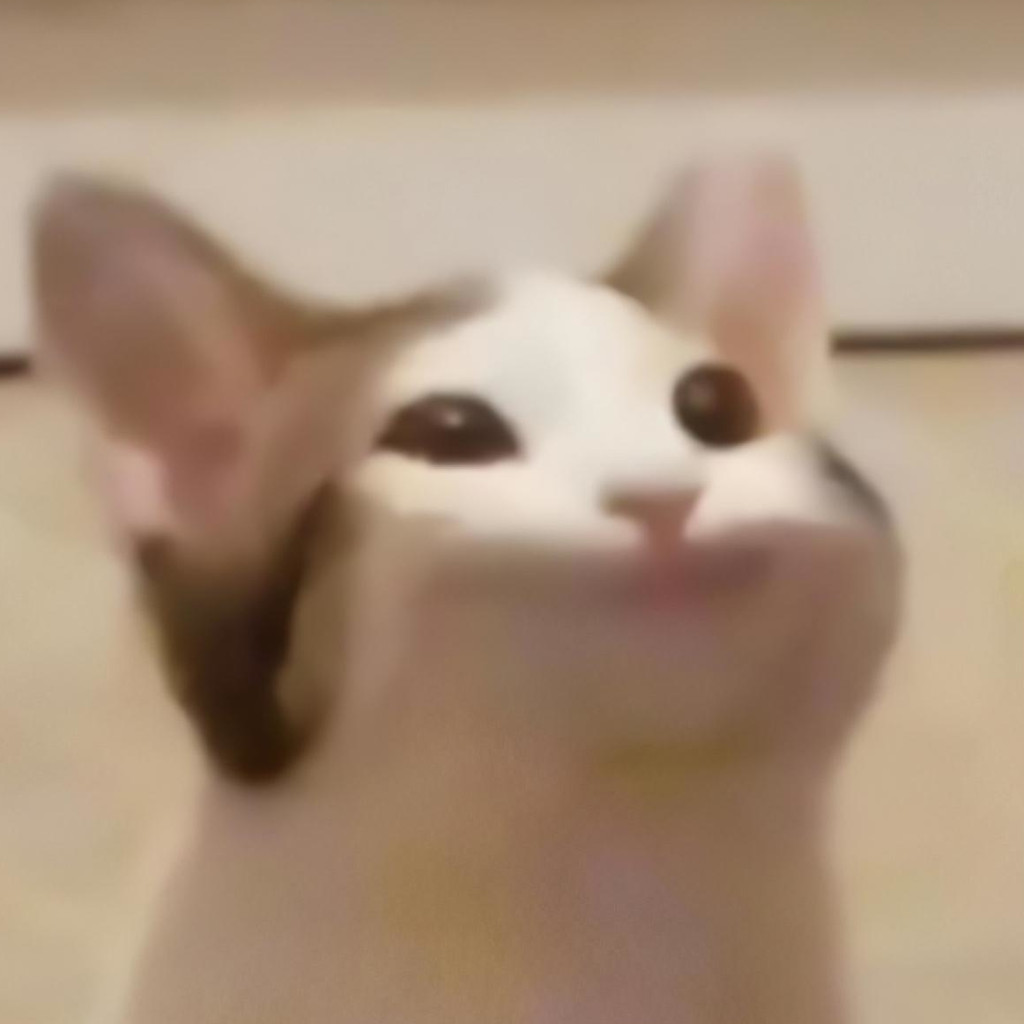

In [9]:
#img.show()
img

In [10]:
img_array = np.array(img)

print(f"{img_array.shape = }")


img_array.shape = (1024, 1024, 3)


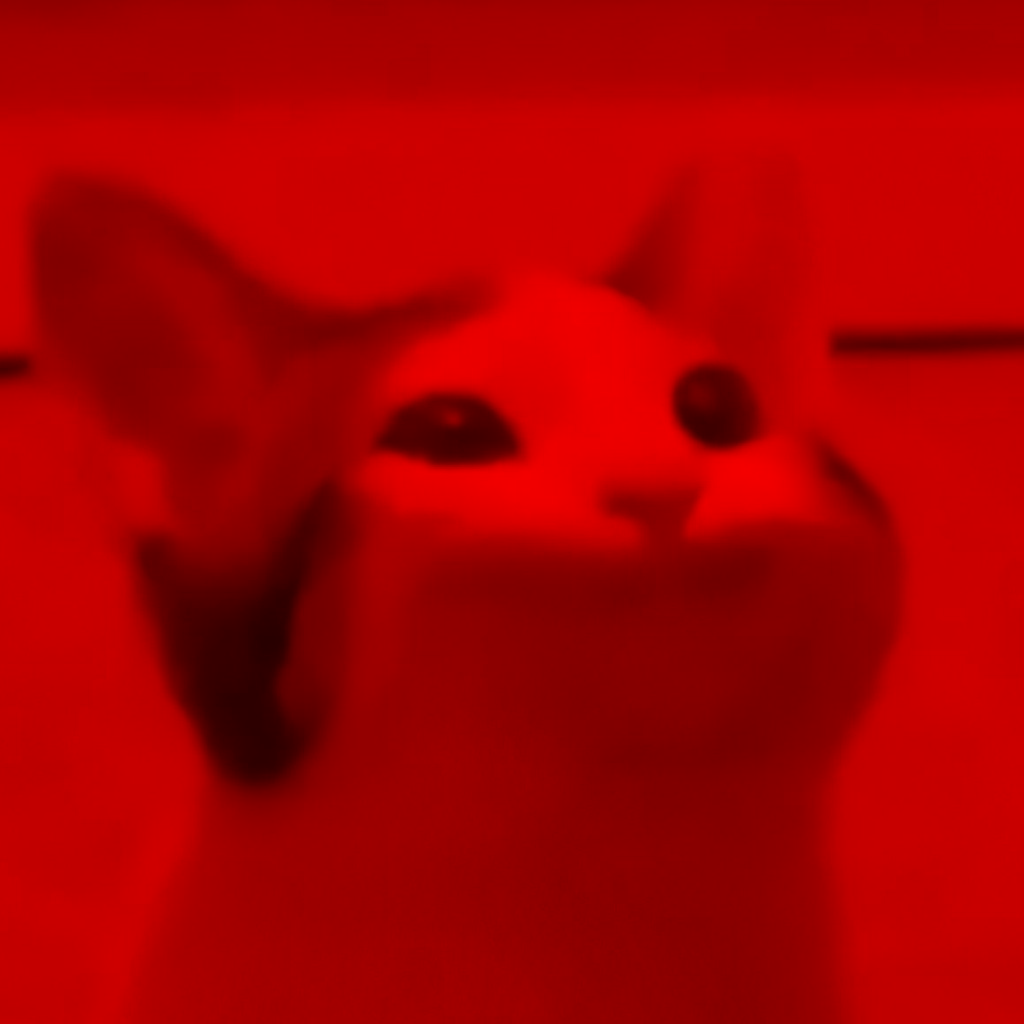

In [11]:
img_array_only_red = img_array.copy() # If copy() is not used a pointer will be created
img_array_only_red[:,:,1:3] = 0 #Set green and blue to 0
Image.fromarray(img_array_only_red).show()

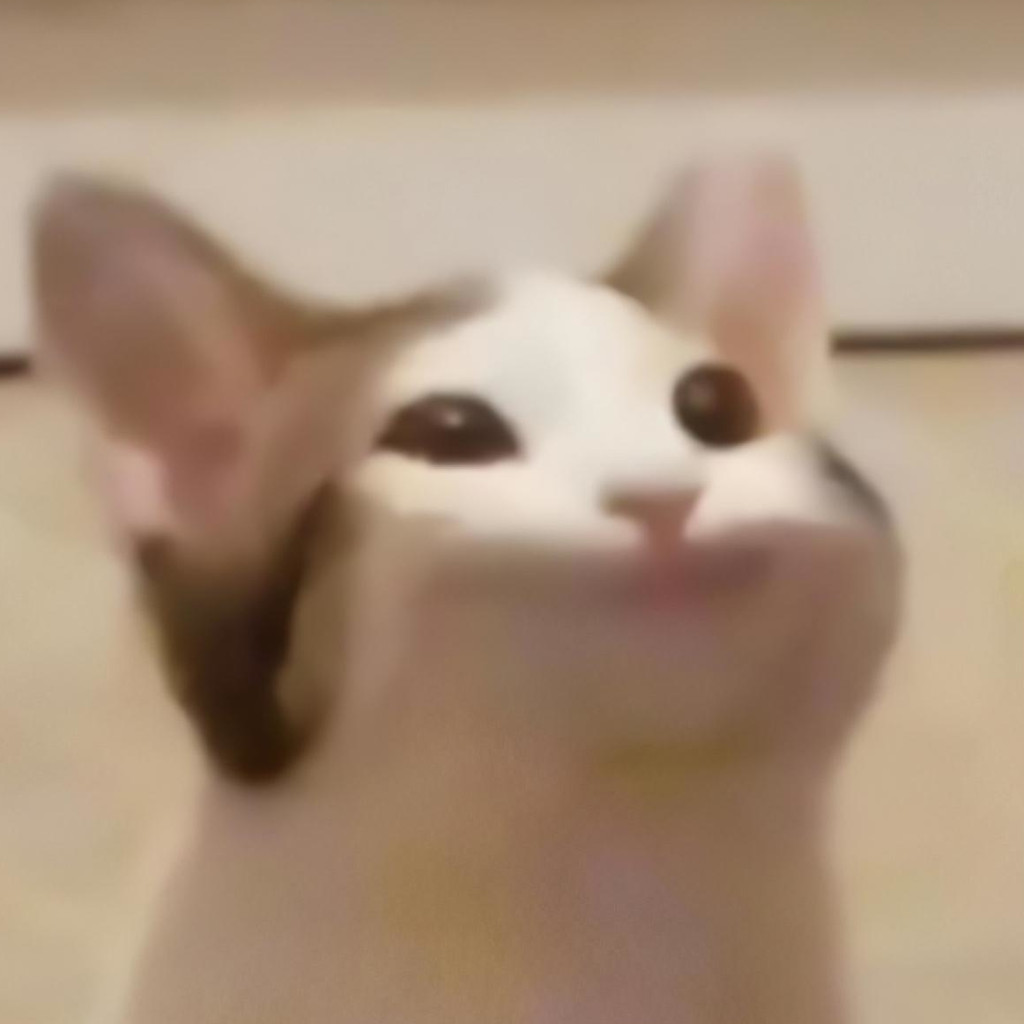

In [12]:
img.show()

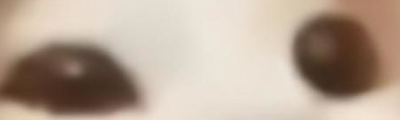

In [13]:
cat_eyes = img_array.copy()
cat_eyes = cat_eyes[350:470,380:780,:]
Image.fromarray(cat_eyes).show()


# Task 2   
 I want to draw a red box over the eyes
 
 8 bit or 0 - 255


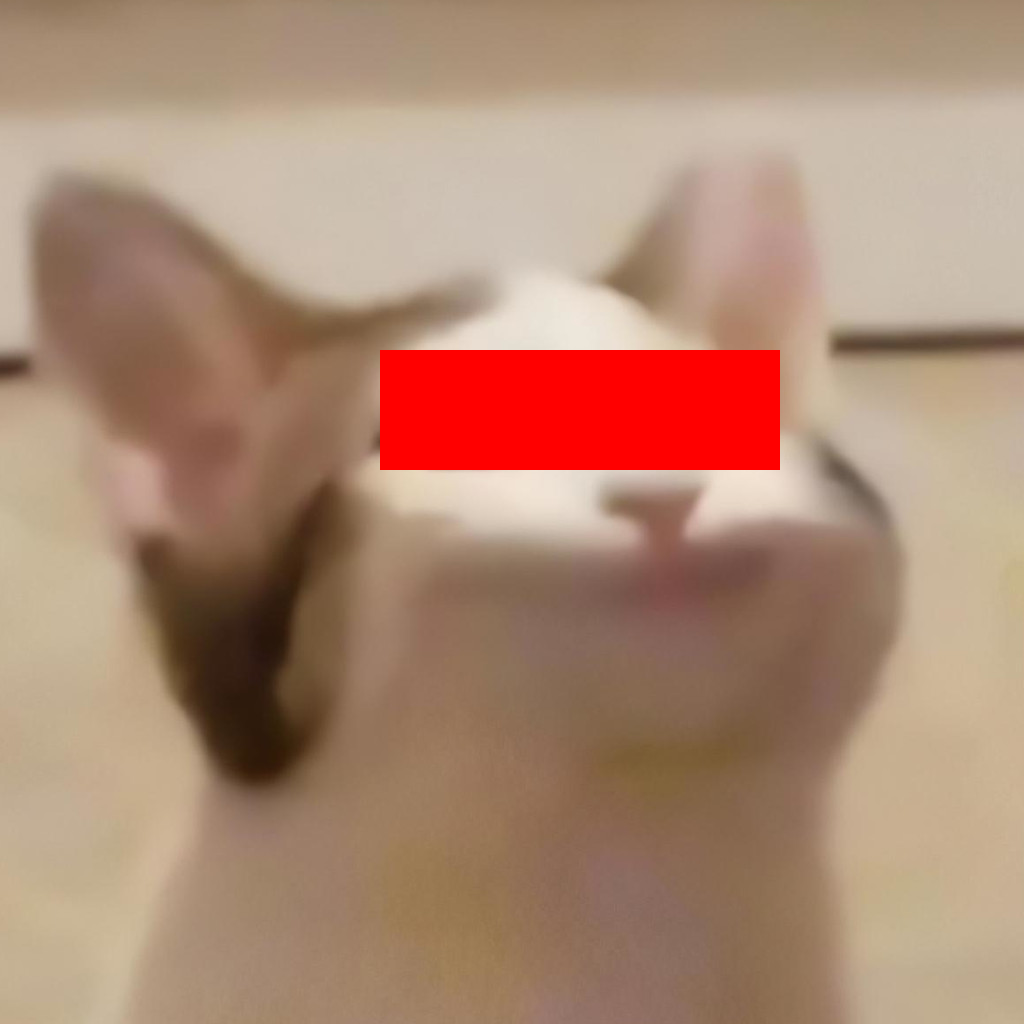

In [14]:
img_array_red_box = img_array.copy()
img_array_red_box[350:470,380:780,[1,2]] = 0
img_array_red_box[350:470,380:780,0] = 255 #Exceed 255 rotated back to 0
Image.fromarray(img_array_red_box).show()


## Task 4

Draw a black frame over the eye area

In [15]:
frame = np.ones((5,5))
print(frame)
print()
frame[1:-1] = 0
print(frame)
area = np.arange(0,25,1).reshape(5,5)
print(f"{area = }")
print(f"{frame * area = }")



[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]]
area = array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])
frame * area = array([[ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [20., 21., 22., 23., 24.]])


(120, 400, 3)


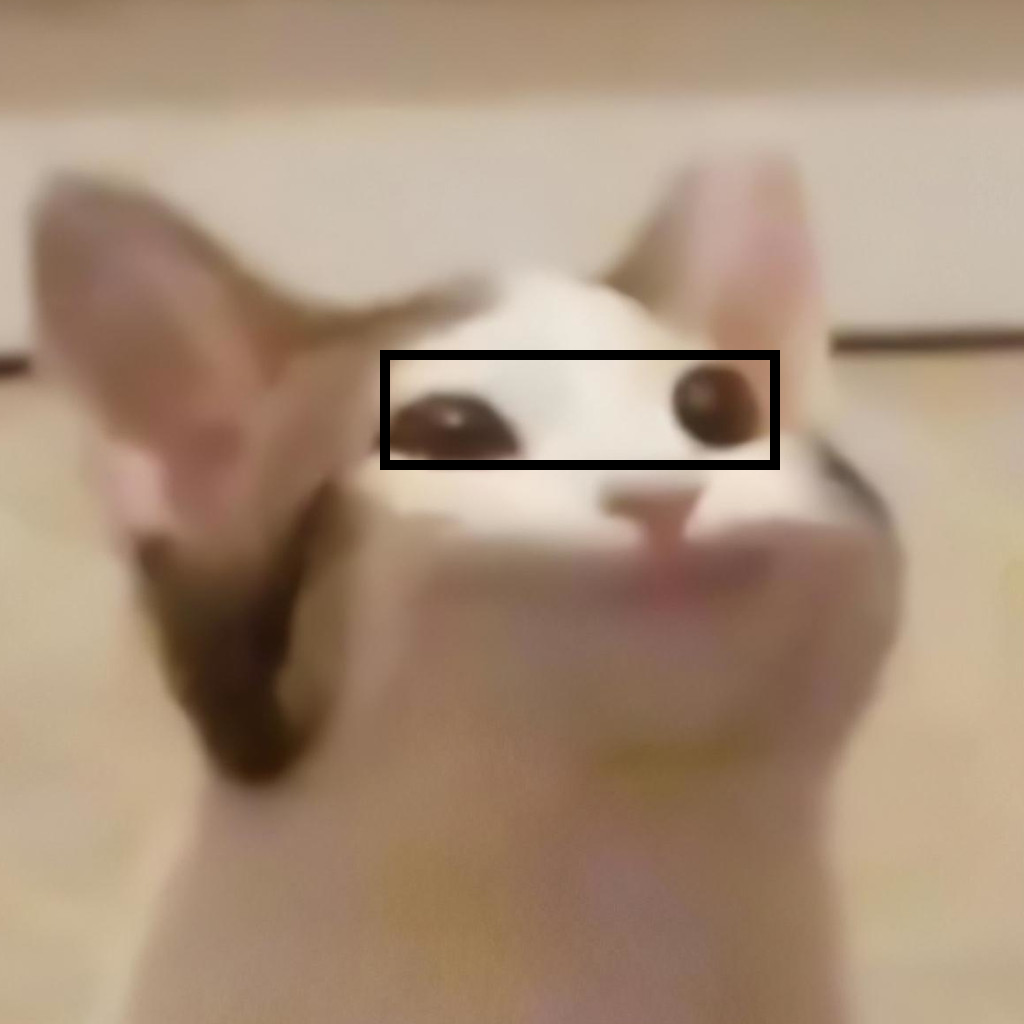

In [16]:
img_with_black_frame = img_array.copy()
#350:470,380:780
x_min = 350
x_max = 470
y_min = 380
y_max = 780

select_area = img_with_black_frame[x_min:x_max, y_min:y_max, :]
print(select_area.shape) 
frame = np.zeros((select_area.shape))
frame[10:-10, 10:-10, :] = 1
img_with_black_frame[x_min:x_max, y_min:y_max, :] = select_area * frame

Image.fromarray(img_with_black_frame).show()

## Task 6

Rotate the image 90 degrees counter clock-wise

In [17]:
# Hint1 : Transpose
a = np.arange(0,2*3*4).reshape(2,3,4,1)
print(a.shape, a.T.shape)
#a.T

#Hint 2: .swapaxes from numpy
print(np.swapaxes(a, 1, 3).shape)
print(a.swapaxes(1, 3).shape)

(2, 3, 4, 1) (1, 4, 3, 2)
(2, 1, 4, 3)
(2, 1, 4, 3)


(3, 1024, 1024)


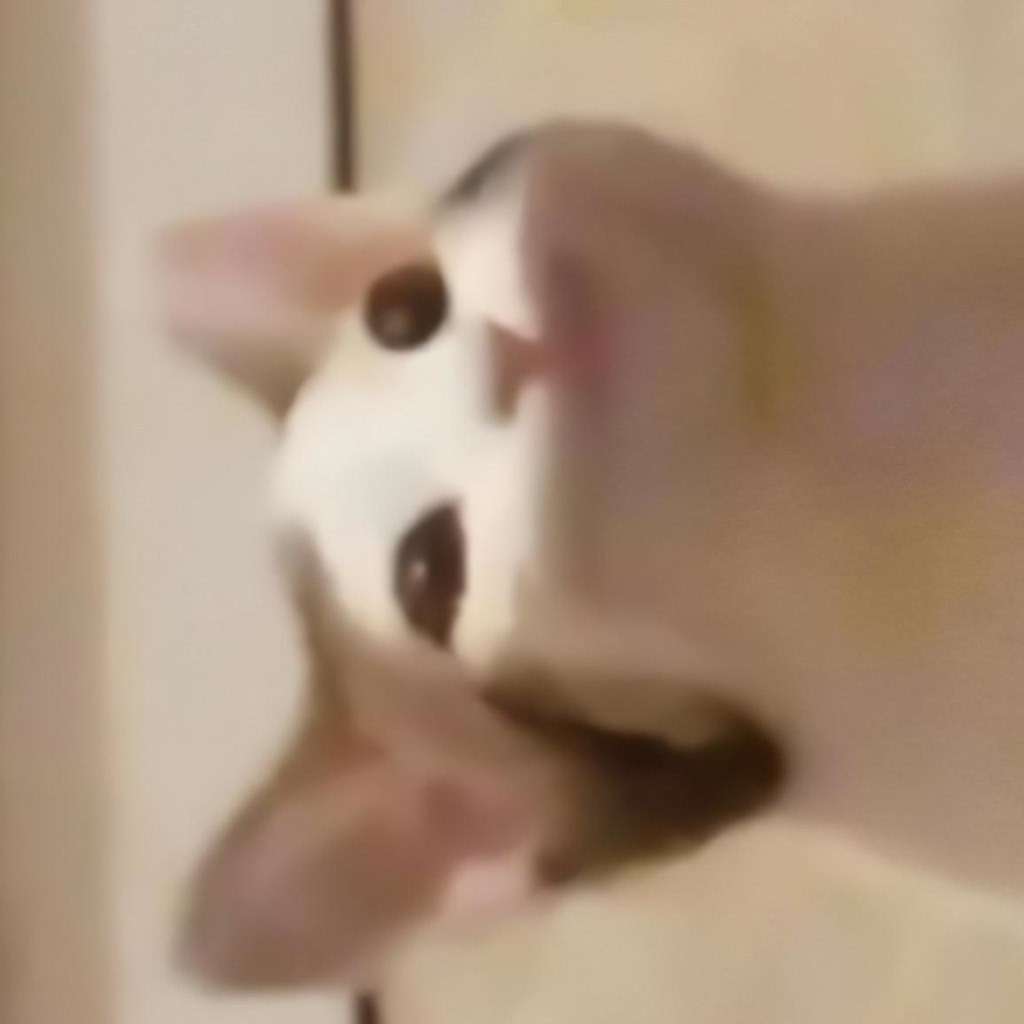

In [18]:
image_array_rotate_90 = img_array.copy()
print(image_array_rotate_90.T.shape) # Transpose wil not work
#Step 1
image_array_rotate_90 = image_array_rotate_90.swapaxes(0,1)
#Step 2 - Flip
image_array_rotate_90 = np.flip(image_array_rotate_90,0)
Image.fromarray(image_array_rotate_90).show()

# Task 7

Rotate to 180 and

Rotate 270 counter clock-wise

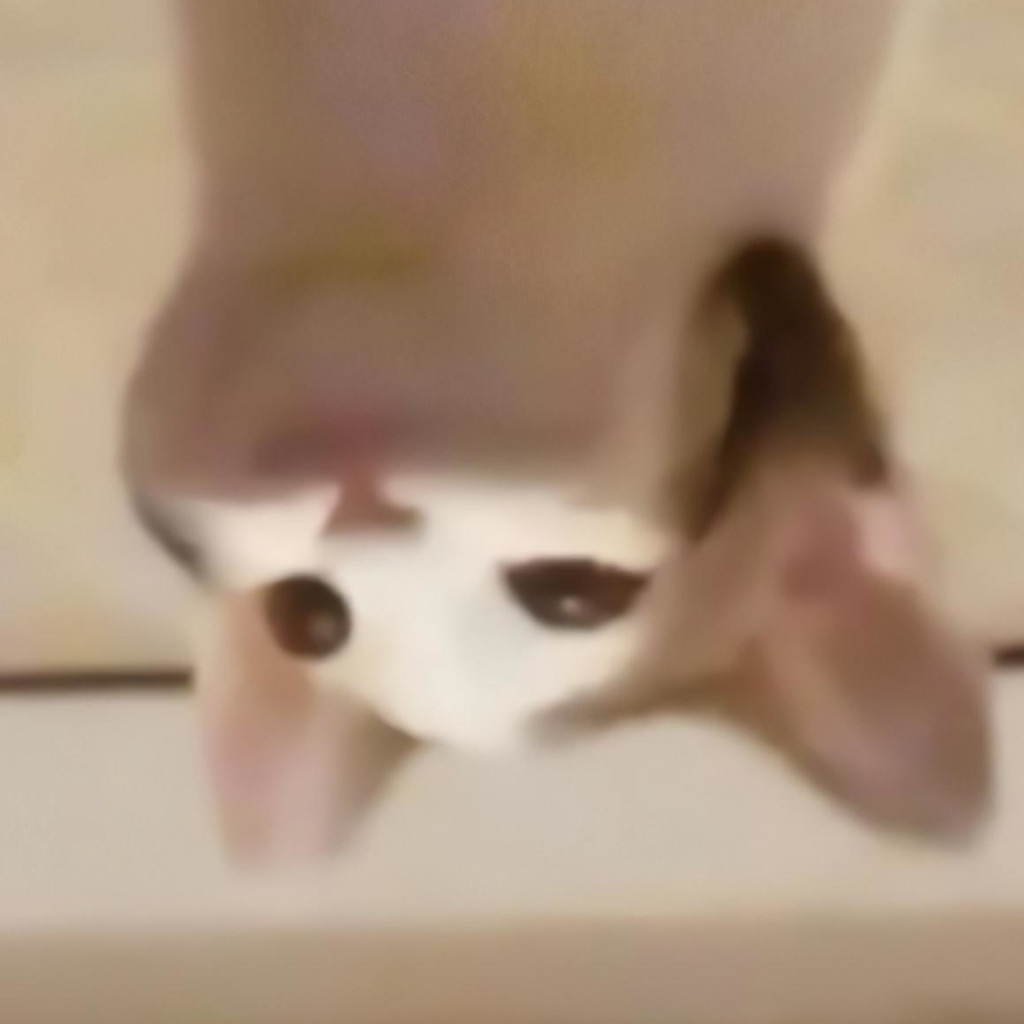

In [19]:
image_array_rotate_180 = img_array.copy()

image_array_rotate_180 = np.flip(image_array_rotate_180,0)
image_array_rotate_180 = np.flip(image_array_rotate_180,1) # Flip along column axis

Image.fromarray(image_array_rotate_180).show()


In [20]:
image_array_rotate_270 = img_array.copy()
image_array_rotate_270 = np.flip(image_array_rotate_270, 0)
image_array_rotate_270 = image_array_rotate_270.swapaxes()


Image.fromarray(image_array_rotate_270).show()

TypeError: swapaxes() takes exactly 2 arguments (0 given)

In [ ]:
Image.fromarray(img_array_only_red).save('./red_cat.jpg')

# Task 8

Make a GIF out of the rotated images

GIF is s series of images ==> List of images

4 frames

images = [original, 90 degree, 180 degree, 270 degree]

images[0].save('./cat.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)



In [ ]:
images = []
images.append(Image.fromarray(img_array))
images.append(Image.fromarray(image_array_rotate_90))
images.append(Image.fromarray(image_array_rotate_180))
images.append(Image.fromarray(image_array_rotate_270))
images

images[0].save('./cat.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

## Task 9

Build a 4D array such that first dimension is `n_samples`

* Hint: numpy.concatenate, numpy.expand_dims


In [ ]:
img_array.shape, img_array_only_red.shape

# data.shape ==> (n_samples, 1024, 1024, 3)
# data.shape ==> (2, 1024, 1024, 3) for 2 images

(1024, 1024, 3)

In [ ]:
a = np.arange(0,10)
b = np.arange(10,20)
#np.concatenate([a,b]).shape
print(a)
#a.reshape(1,-1) # 1 sample 10 features

a = np.expand_dims(a, axis=1)
print(a.shape)
a = np.expand_dims(a, axis=2)
print(a.shape)
a = np.expand_dims(a, axis=0)
print(a.shape)

[0 1 2 3 4 5 6 7 8 9]
(10, 1)
(10, 1, 1)
(1, 10, 1, 1)


In [ ]:
a = np.arange(0,10)
a = np.expand_dims(a, axis=0)
b = np.arange(10,20)
b = np.expand_dims(b, axis=0)
print(a.shape, b.shape)
dataset  = np.concatenate([a,b])
print(dataset.shape)

(1, 10) (1, 10)
(2, 10)


In [ ]:
images = []
images.append(np.expand_dims(img_array, axis=0))
images.append(np.expand_dims(img_array_only_red, axis=0))
images.append(np.expand_dims(img_array_only_red, axis=0))
images.append(np.expand_dims(img_array_only_red, axis=0))
dataset = np.concatenate(images, axis=0)
print(dataset.shape)

(4, 1024, 1024, 3)


In [ ]:
np.vstack(images).shape

(1, 4096, 1024, 3)